# **0. Importing Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing our main dataset
potter_url = 'https://drive.google.com/file/d/1ACB0NHXIK48bEV8wgsQ_aLCSbQYWqAD6/view?usp=sharing'

potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]

df = pd.read_csv(potter)

In [3]:
df.to_pickle('pakistan_largest_ecommerce_dataframe.pkl')

In [4]:
df = pd.read_pickle('pakistan_largest_ecommerce_dataframe.pkl')

In [5]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,Jul-16,FY17,3.0
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016,7,2016-7,Jul-16,FY17,4.0
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,Jul-16,FY17,5.0


# **1. Data Cleaning**

## **1.1 Converting Datatypes**

Before continuing it is important to convert our datatype to ensure all of our feature can be analyze as it meant to be

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

Lets convert:\
**qty_ordered** to int\
**created at** to datetime\
**working date** to datetime\
**MV** to float\
**Customer Since** to datetime\
**Customer ID** to string

In [7]:
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,Jul-16,FY17,3.0


In [8]:
df['qty_ordered'] = df['qty_ordered'].astype(int)
df[' MV '] = df[' MV '].str.replace(',', '', regex=False) #Removing ","
df[' MV '] = df[' MV '].str.replace(' -   ', '0', regex=False) #Replacing "-" to 0
df[' MV '] = df[' MV '].astype(int)
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')
df['Working Date'] = pd.to_datetime(df['Working Date'], format='%m/%d/%Y')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%Y-%m')
df['Customer ID'] = df['Customer ID'].astype(str)

In [9]:
df['BI Status'].value_counts()

,count
BI Status,
Net,234178
Gross,201454
Valid,148891
#REF!,1


In [10]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,2016-07-01,#REF!,1950,2016,7,2016-07-01,Jul-16,FY17,1.0
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,2016-07-01,Gross,240,2016,7,2016-07-01,Jul-16,FY17,2.0
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,2016-07-01,Gross,2450,2016,7,2016-07-01,Jul-16,FY17,3.0
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,2016-07-01,Net,360,2016,7,2016-07-01,Jul-16,FY17,4.0
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,0.0,cod,2016-07-01,Valid,1110,2016,7,2016-07-01,Jul-16,FY17,5.0


## **1.2 Treat Typos**

In [11]:
pd.reset_option('all')

for i in df.select_dtypes(exclude = 'number'):
  print(df[i].value_counts())
  print('-----------------------------------------------')

status
complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64
-----------------------------------------------
created_at
2016-11-25    15169
2017-11-17    13698
2017-11-24    13191
2017-05-19    11511
2016-11-23     8478
              ...  
2018-08-22       92
2016-09-14       83
2016-07-06       72
2016-09-13       52
2016-07-07       51
Name: count, Length: 789, dtype: int64
-----------------------------------------------
sku
MATSAM59DB75ADB2F80              3775
Al Muhafiz Sohan Halwa Almond    2258
emart_00-7                       2027
kcc_krone deal                   1894
infinix_Zero 4-Grey              1793
       

We find that there is an out of place value on BI Status with #REF value, lets remove them

In [12]:
df = df[df['BI Status'] != '#REF!']

In [13]:
df['BI Status'].value_counts()

,count
BI Status,
Net,234178
Gross,201454
Valid,148891


## **1.3 Treat Duplicates**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584523 entries, 1 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584523 non-null  int64         
 1   status                 584508 non-null  object        
 2   created_at             584523 non-null  datetime64[ns]
 3   sku                    584503 non-null  object        
 4   price                  584523 non-null  float64       
 5   qty_ordered            584523 non-null  int64         
 6   grand_total            584523 non-null  float64       
 7   increment_id           584523 non-null  object        
 8   category_name_1        584359 non-null  object        
 9   sales_commission_code  447345 non-null  object        
 10  discount_amount        584523 non-null  float64       
 11  payment_method         584523 non-null  object        
 12  Working Date           584523 non-null  datetime6

In [15]:
df.duplicated().sum()

0

There are no duplicate value accross all feature

## **1.4 Treat Missing Values & Treat Unappropriate Features**

### **1.4.1 Removing Redundant Features**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584523 entries, 1 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584523 non-null  int64         
 1   status                 584508 non-null  object        
 2   created_at             584523 non-null  datetime64[ns]
 3   sku                    584503 non-null  object        
 4   price                  584523 non-null  float64       
 5   qty_ordered            584523 non-null  int64         
 6   grand_total            584523 non-null  float64       
 7   increment_id           584523 non-null  object        
 8   category_name_1        584359 non-null  object        
 9   sales_commission_code  447345 non-null  object        
 10  discount_amount        584523 non-null  float64       
 11  payment_method         584523 non-null  object        
 12  Working Date           584523 non-null  datetime6

Lets remove features unneeded for analysis as they may not provide meaningful insights for analysis or already represented by other features, such feature include:
* item_id: This feature may not give enough insights for analysis
* Customer_ID: This feature may not give enough insights for analysis
* increment_id:  This feature may not give enough insights for analysis
* sales_commission_code: since there are a significant amount of values missing, we cant predict what those missing values are so we may remove the entire column
* created_at: Can be represented by M-Y feature
* Customer Since: Can be represented by M-Y feature
* Working Date: Can be represented by M-Y feature
* FY: Can be represented by M-Y feature



In [17]:
df = df.drop(['item_id', 'sales_commission_code', 'created_at', 'Customer Since', 'Working Date', 'FY'], axis=1)

In [18]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,MV,Year,Month,M-Y,Customer ID
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,240,2016,7,Jul-16,2.0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2450,2016,7,Jul-16,3.0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,360,2016,7,Jul-16,4.0
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,1110,2016,7,Jul-16,5.0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,80,2016,7,Jul-16,6.0


Lets check for missing value

### **1.4.2 Removing NaN or Missing Values**

In [19]:
df.isnull().sum().sort_values(ascending = False)

,0
category_name_1,164
sku,20
status,15
price,0
qty_ordered,0
grand_total,0
increment_id,0
discount_amount,0
payment_method,0
BI Status,0


Lets remove null value on category name and status Since as the number of missing value is miniscule compared to the whole dataset

In [20]:
df = df[~df['status'].isnull()]
df = df[~df['category_name_1'].isnull()]
df = df[~df['sku'].isnull()]
df = df[~df['Customer ID'].isnull()]

In [21]:
df.isnull().sum().sort_values(ascending = False)

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,0
discount_amount,0
payment_method,0
BI Status,0


In [22]:
df[df['Customer ID'] == 'nan']['Customer ID'].value_counts()

,count
Customer ID,
nan,11


Lets remove nan value aswel from customer ID

In [23]:
df = df[df['Customer ID'] != 'nan']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584313 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           584313 non-null  object 
 1   sku              584313 non-null  object 
 2   price            584313 non-null  float64
 3   qty_ordered      584313 non-null  int64  
 4   grand_total      584313 non-null  float64
 5   increment_id     584313 non-null  object 
 6   category_name_1  584313 non-null  object 
 7   discount_amount  584313 non-null  float64
 8   payment_method   584313 non-null  object 
 9   BI Status        584313 non-null  object 
 10   MV              584313 non-null  int64  
 11  Year             584313 non-null  int64  
 12  Month            584313 non-null  int64  
 13  M-Y              584313 non-null  object 
 14  Customer ID      584313 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 71.3+ MB


In [25]:
check = ['status', 'category_name_1', 'payment_method']

for i in check:
  print(df[i].value_counts())
  print('------------------------------')

status
complete          233683
canceled          201127
received           77284
order_refunded     59498
refund              8020
cod                 2854
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64
------------------------------
category_name_1
Mobiles & Tablets     115709
Men's Fashion          92218
Women's Fashion        59719
Appliances             52413
Superstore             43611
Beauty & Grooming      41493
Soghaat                34011
Others                 29208
Home & Living          26504
Entertainment          26322
Health & Sports        17502
Kids & Baby            16489
Computing              15933
\N                      7833
School & Education      3478
Books                   1870
Name: count, dtype: int64
------------------------------

There are several /N value in status column and category name column lets remove them

In [26]:
df = df[df['status'] != r'\N']
df = df[df['category_name_1'] != r'\N']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576480 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           576480 non-null  object 
 1   sku              576480 non-null  object 
 2   price            576480 non-null  float64
 3   qty_ordered      576480 non-null  int64  
 4   grand_total      576480 non-null  float64
 5   increment_id     576480 non-null  object 
 6   category_name_1  576480 non-null  object 
 7   discount_amount  576480 non-null  float64
 8   payment_method   576480 non-null  object 
 9   BI Status        576480 non-null  object 
 10   MV              576480 non-null  int64  
 11  Year             576480 non-null  int64  
 12  Month            576480 non-null  int64  
 13  M-Y              576480 non-null  object 
 14  Customer ID      576480 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 70.4+ MB


### **1.4.3 Add Canceled Flag Column**

Since we are interested in canceled status, we can make a new feature that flags order status canceled as 1 and other statuses as 0. Then we can remove status column

In [28]:
def as_cancel(value):
  if value == 'canceled':
    return 1
  else:
    return 0

In [29]:
df['is_canceled'] = df['status'].apply(as_cancel)

In [30]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,MV,Year,Month,M-Y,Customer ID,is_canceled
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,240,2016,7,Jul-16,2.0,1
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2450,2016,7,Jul-16,3.0,1
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,360,2016,7,Jul-16,4.0,0
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,1110,2016,7,Jul-16,5.0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,80,2016,7,Jul-16,6.0,1


### **1.4.4 Add Discount Occurence Flag**

In [31]:
def disc(value):
  if value > 0:
    return 1
  else:
    return 0

In [32]:
df['is_discounted'] = df['discount_amount'].apply(disc)

In [33]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,MV,Year,Month,M-Y,Customer ID,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,240,2016,7,Jul-16,2.0,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2450,2016,7,Jul-16,3.0,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,360,2016,7,Jul-16,4.0,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,1110,2016,7,Jul-16,5.0,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,80,2016,7,Jul-16,6.0,1,0


### **1.4.5 Correcting Inappropriate Value in Columns**

#### **1.4.5.1 Check for Transaction Grand Total Validity**

In [34]:
df['grand_total2'] = (df['price'] * df['qty_ordered']) - df['discount_amount']

In [35]:
df['diff'] = df['grand_total2'] - df['grand_total']

In [36]:
df['diff'].describe()

,diff
count,5.764800e+05
mean,-1.872145e+03
std,3.086616e+04
min,-8.944000e+06
25%,-9.990000e+02
50%,-1.500000e+02
75%,0.000000e+00
max,2.079980e+05


There are difference between manual price * quantity and the given grand total data. From the statistics above, it is indicative that there are miss calculation of the original grand total column where it supposed to calculate the transaction amount of each order. We may replace this grand total column with appropriate calculation. We'll use (price * quantity) - discount for the calculation

In [37]:
df['grand_total'] = (df['price'] * df['qty_ordered']) - df['discount_amount']

In [38]:
df = df.drop(['grand_total2', 'diff'], axis=1)

Let's check for further inappropriate values

#### **1.4.4.2 Check for Price and Order Quantity Validity**

In [39]:
df[df['price'] == 0]['price'].value_counts()

,count
price,
0.0,2203


There are around 2,231 order that has 0 value. For analysis purposes we can remove these value as it may not plausible for a product price to be 0

In [40]:
df = df[df['price'] != 0]

In [41]:
df[df['qty_ordered'] == 0]['qty_ordered'].value_counts()

,count
qty_ordered,


There are no more order that has 0 value for quantity ordered :D

### **1.4.6 Checking Further for Redundant Features**

In [42]:
df['diff'] = (df['price'] * df['qty_ordered']) - df[' MV ']

In [43]:
df['diff'].describe()

,diff
count,574277.000000
mean,-0.002126
std,0.046873
min,-0.500000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.490000


It is found that the column MV has the same value as price * quantity. This column may not give further insights for our analysis as we have the grand total column that represent the transaction amount fr each order. Lets remove the column MV, lets remove it.

In [44]:
df = df.drop([' MV ','diff'], axis = 1)

In [45]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,Year,Month,M-Y,Customer ID,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,2016,7,Jul-16,2.0,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2016,7,Jul-16,3.0,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,2016,7,Jul-16,4.0,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,2016,7,Jul-16,5.0,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,2016,7,Jul-16,6.0,1,0


The Month and Year feaure may come in as not very useful, lets merge them into M-Y as one

In [46]:
df['M-Y'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [47]:
df['M-Y'] = pd.to_datetime(df['M-Y'], format='%Y-%m')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574277 entries, 1 to 584523
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   status           574277 non-null  object        
 1   sku              574277 non-null  object        
 2   price            574277 non-null  float64       
 3   qty_ordered      574277 non-null  int64         
 4   grand_total      574277 non-null  float64       
 5   increment_id     574277 non-null  object        
 6   category_name_1  574277 non-null  object        
 7   discount_amount  574277 non-null  float64       
 8   payment_method   574277 non-null  object        
 9   BI Status        574277 non-null  object        
 10  Year             574277 non-null  int64         
 11  Month            574277 non-null  int64         
 12  M-Y              574277 non-null  datetime64[ns]
 13  Customer ID      574277 non-null  object        
 14  is_canceled      574277 n

In [49]:
df['Customer ID'].value_counts()

,count
Customer ID,
85775.0,2524
163.0,2332
35.0,1867
33.0,1360
31025.0,1344
...,...
52782.0,1
52786.0,1
52792.0,1


Lets remove the decimal from the string of customer ID

In [50]:
df['Customer ID'] = df['Customer ID'].str.replace(r'\.0$', '', regex=True)

In [51]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,Year,Month,M-Y,Customer ID,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,2016,7,2016-07-01,2,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2016,7,2016-07-01,3,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,2016,7,2016-07-01,4,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,2016,7,2016-07-01,5,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,2016,7,2016-07-01,6,1,0


## **1.5 Changing Features Name**

Lets change ambiguous and inefficient column name in the dataset

In [52]:
df = df.rename(columns={"category_name_1": "category_name", "BI Status": "bi_status", 'M-Y':'transaction_date', 'Month':'month', 'Year':'year', 'Customer ID':'customer_id'})

In [53]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,bi_status,year,month,transaction_date,customer_id,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,2016,7,2016-07-01,2,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2016,7,2016-07-01,3,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,2016,7,2016-07-01,4,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,2016,7,2016-07-01,5,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,2016,7,2016-07-01,6,1,0


All Done! lets move on to EDA!

# **2. Exploratory Data Analysis - Main Data**

## **2.1 General EDA**

Lets start with general EDA to know our data distribution better

In [54]:
df.describe()

,price,qty_ordered,grand_total,discount_amount,year,month,transaction_date,is_canceled,is_discounted
count,5.742770e+05,574277.000000,5.742770e+05,574277.000000,574277.000000,574277.000000,574277,574277.000000,574277.000000
mean,6.405061e+03,1.292472,6.740362e+03,505.196979,2017.053290,7.151631,2017-07-25 18:55:00.460230656,0.343451,0.358748
min,1.000000e-01,1.000000,-1.541000e+04,-599.500000,2016.000000,1.000000,2016-07-01 00:00:00,0.000000,0.000000
25%,3.700000e+02,1.000000,3.584000e+02,0.000000,2017.000000,4.000000,2017-02-01 00:00:00,0.000000,0.000000
50%,9.200000e+02,1.000000,9.500000e+02,0.000000,2017.000000,7.000000,2017-08-01 00:00:00,0.000000,0.000000
75%,4.164000e+03,1.000000,4.520000e+03,167.000000,2018.000000,11.000000,2018-02-01 00:00:00,1.000000,1.000000
max,1.012626e+06,1000.000000,8.944000e+06,90300.000000,2018.000000,12.000000,2018-08-01 00:00:00,1.000000,1.000000
std,1.503047e+04,3.982050,3.392688e+04,1513.250179,0.704403,3.488561,NaN,0.474861,0.479634


In [55]:
df.describe(include=['O'])

,status,sku,increment_id,category_name,payment_method,bi_status,customer_id
count,574277,574277,574277,574277,574277,574277,574277
unique,15,84236,401009,15,18,3,113967
top,complete,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,cod,Net,85775
freq,230088,3775,72,115396,265809,230580,2524


<Axes: >

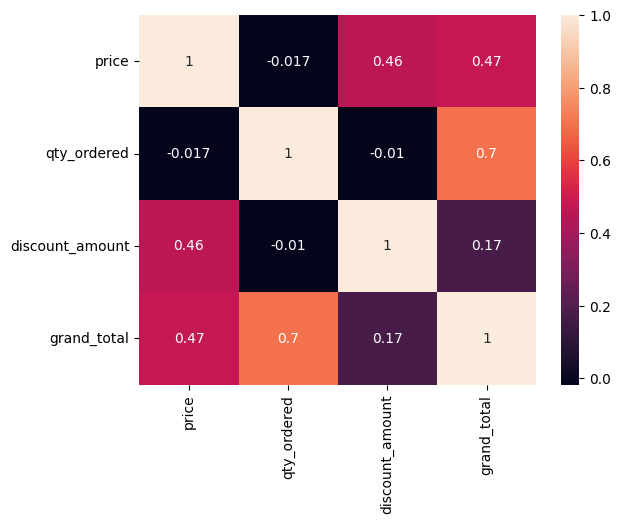

In [56]:
correlation = df[['price', 'qty_ordered', 'discount_amount', 'grand_total']].corr()
sns.heatmap(correlation, annot = True)

There are no strong correlation between numerical features on the dataset

## **2.2 EDA by Canceled Status**

In [57]:
check = df.groupby('is_canceled').agg({'is_canceled':'count'}).rename(columns={'is_canceled':'count'}).sort_values(by='count', ascending=False).reset_index()
check['proportion'] = check['count'] / check['count'].sum()*100
check

,is_canceled,count,proportion
0,0,377041,65.654902
1,1,197236,34.345098


Around 34.42% of the total order are canceled order. From an Ecommerce perspective, 34.43% of canceled order can be considered to be very high as the industry average is between 5-10% and in some cases like eBay they put a strict cancellation rate at only 0.5%

## **2.3 EDA by Canceled Status Overtime**

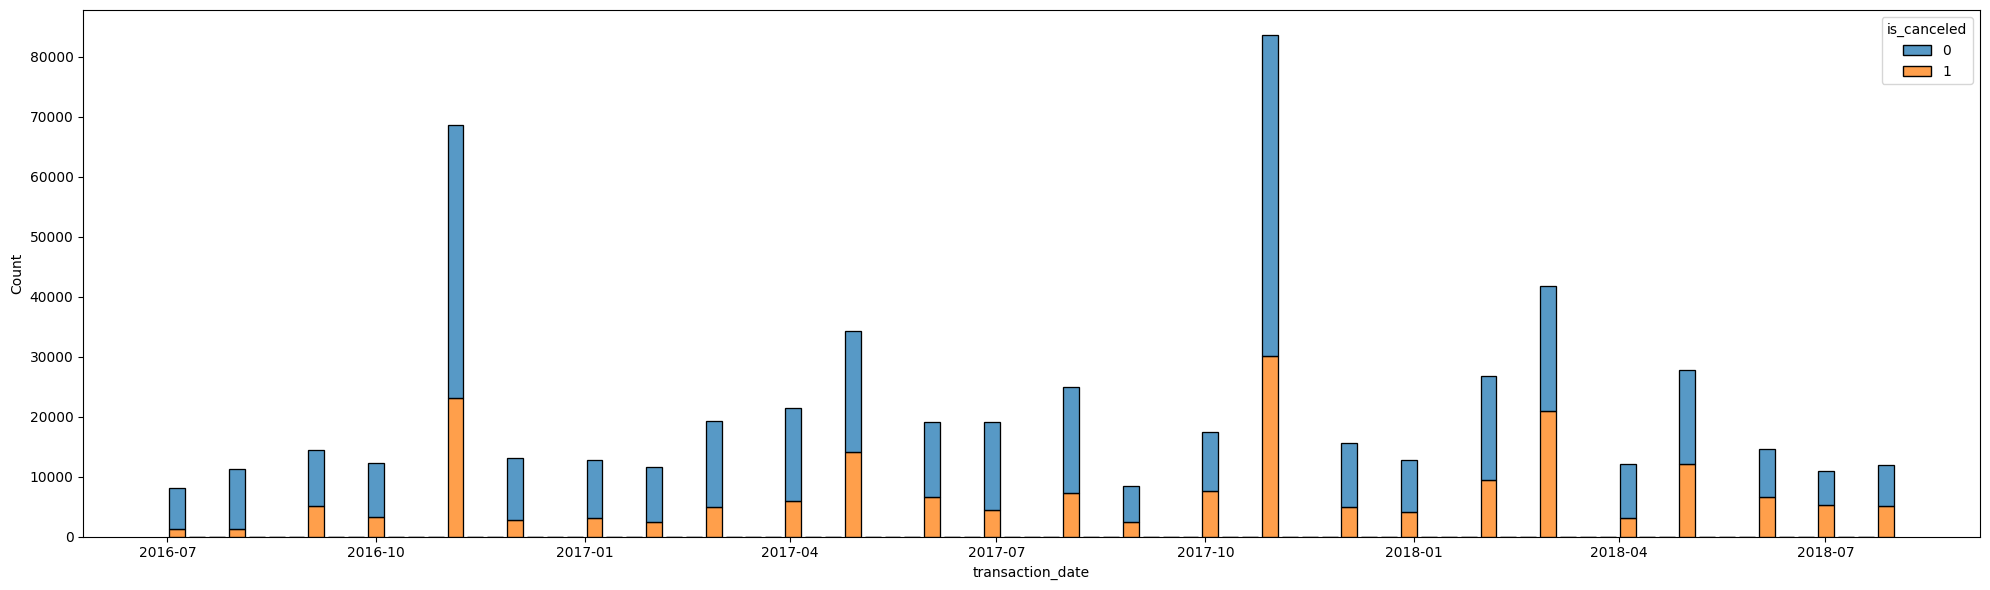

In [58]:
fig = plt.subplots(figsize=(20,6))

sns.histplot(data=df, x='transaction_date', hue='is_canceled', multiple='stack', shrink=0.8)
plt.tight_layout()

In [59]:
dfx = pd.crosstab(df['transaction_date'], df['is_canceled'], normalize='index').reset_index()
dfx.columns.name = None
dfx = dfx[['transaction_date', 0, 1]]
dfx

,transaction_date,0,1
0,2016-07-01,0.836916,0.163084
1,2016-08-01,0.882788,0.117212
2,2016-09-01,0.642837,0.357163
3,2016-10-01,0.735748,0.264252
4,2016-11-01,0.663157,0.336843
5,2016-12-01,0.789241,0.210759
6,2017-01-01,0.764362,0.235638
7,2017-02-01,0.785040,0.214960
8,2017-03-01,0.747242,0.252758
9,2017-04-01,0.720638,0.279362


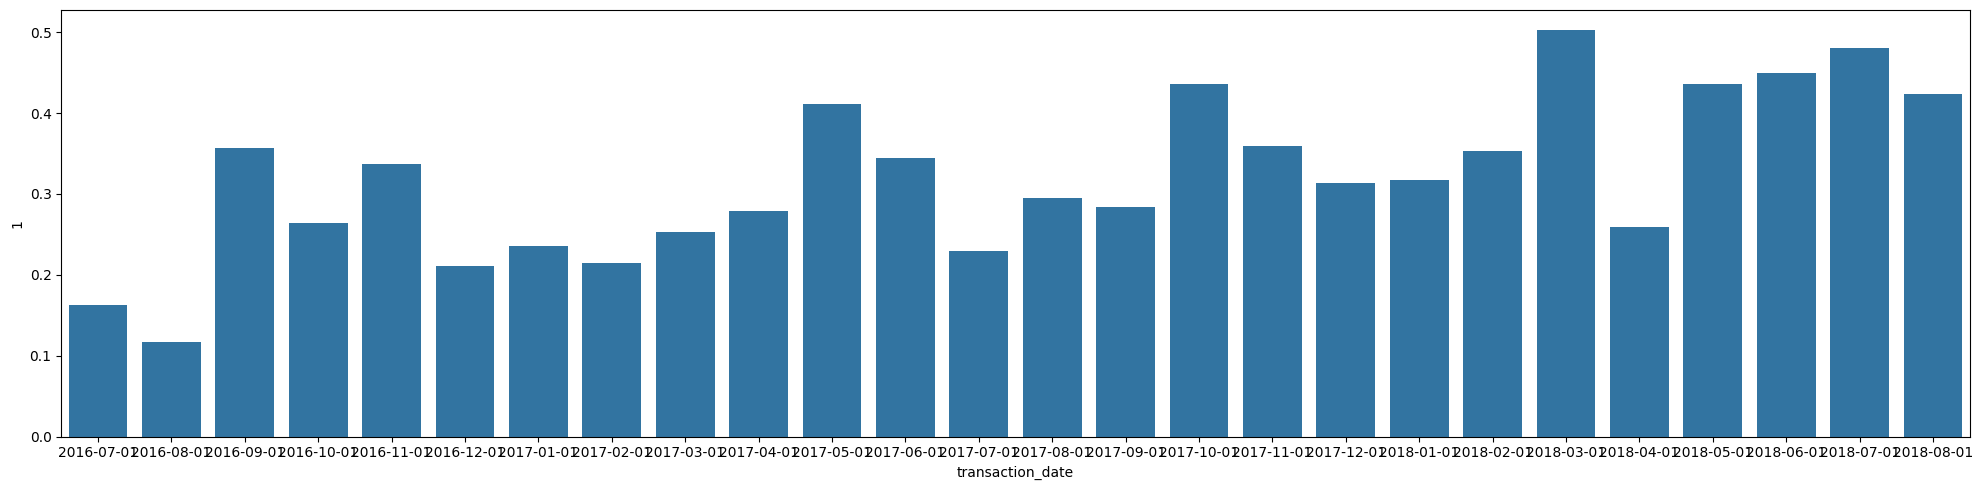

In [60]:
fig = plt.subplots(figsize = (20, 5))

sns.barplot(dfx, x='transaction_date', y = 1)
plt.tight_layout()

Proportion wise, canceled order are rising consistently overtime

## **2.4 EDA by Category**

In [61]:
check = df.groupby(['category_name', 'is_canceled']).\
agg({'category_name':'count'}).\
rename(columns={'category_name': 'count'}).\
sort_values(by=['category_name', 'count'], ascending=[True, False]).reset_index()

check['total'] = check.groupby('category_name')['count'].transform('sum')

check['proportion'] = check['count'] / check['total']*100
check.head()

,category_name,is_canceled,count,total,proportion
0,Appliances,0,30774,52321,58.817683
1,Appliances,1,21547,52321,41.182317
2,Beauty & Grooming,0,31720,41404,76.610955
3,Beauty & Grooming,1,9684,41404,23.389045
4,Books,0,1009,1192,84.647651


In [62]:
check_2 = check[check['is_canceled'] == 1]

In [63]:
check_2.sort_values(by = 'proportion', ascending = False)

,category_name,is_canceled,count,total,proportion
20,Others,1,18364,29188,62.916267
9,Entertainment,1,12578,26318,47.792385
19,Mobiles & Tablets,1,53613,115396,46.460016
7,Computing,1,6810,15902,42.824802
1,Appliances,1,21547,52321,41.182317
27,Superstore,1,13878,43439,31.948249
13,Home & Living,1,7196,26404,27.253446
29,Women's Fashion,1,15862,59486,26.665098
15,Kids & Baby,1,4069,16441,24.749103
17,Men's Fashion,1,21733,91806,23.672745


Category wise, category Others, Entertainment, and Mobiles and Tablets are the top contributor of canceled order where respectively 62.87%, 47.78% and 46.42% are canceled.

In [64]:
check_2['canceled_global'] = df['is_canceled'].eq(1).sum()
check_2['proportion_to_canceled_global'] = check_2['count']/check_2['canceled_global']*100
check_2.sort_values(by = 'proportion_to_canceled_global', ascending = False)

,category_name,is_canceled,count,total,proportion,canceled_global,proportion_to_canceled_global
19,Mobiles & Tablets,1,53613,115396,46.460016,197236,27.182157
17,Men's Fashion,1,21733,91806,23.672745,197236,11.018780
1,Appliances,1,21547,52321,41.182317,197236,10.924476
20,Others,1,18364,29188,62.916267,197236,9.310674
29,Women's Fashion,1,15862,59486,26.665098,197236,8.042142
27,Superstore,1,13878,43439,31.948249,197236,7.036241
9,Entertainment,1,12578,26318,47.792385,197236,6.377132
3,Beauty & Grooming,1,9684,41404,23.389045,197236,4.909854
25,Soghaat,1,7588,34001,22.316991,197236,3.847168
13,Home & Living,1,7196,26404,27.253446,197236,3.648421


Compared to the total global of canceled order, category Mobiles & Tablets is contribute the most canceled order with contribution of 27.18%

## **2.5 EDA by Payment Method**

In [65]:
check = df.groupby(['payment_method', 'is_canceled']).\
agg({'is_canceled':'count'}).\
rename(columns={'is_canceled':'count'}).\
sort_values(by = ['payment_method', 'count'], ascending = [True, False]).reset_index()

In [66]:
check['total'] = check.groupby(['payment_method'])['count'].transform('sum')
check['proportion'] = check['count'] / check['total']*100
check

,payment_method,is_canceled,count,total,proportion
0,Easypay,1,51844,82619,62.750699
1,Easypay,0,30775,82619,37.249301
2,Easypay_MA,1,9137,13921,65.634653
3,Easypay_MA,0,4784,13921,34.365347
4,Payaxis,1,60128,96204,62.500520
5,Payaxis,0,36076,96204,37.499480
6,apg,1,1361,1758,77.417520
7,apg,0,397,1758,22.582480
8,bankalfalah,1,16151,23011,70.188171
9,bankalfalah,0,6860,23011,29.811829


In [67]:
check = check[check['is_canceled'] == 1]
check.sort_values(by = 'proportion', ascending = False)

,payment_method,is_canceled,count,total,proportion
29,mygateway,1,620,635,97.637795
6,apg,1,1361,1758,77.417520
33,ublcreditcard,1,616,826,74.576271
8,bankalfalah,1,16151,23011,70.188171
2,Easypay_MA,1,9137,13921,65.634653
0,Easypay,1,51844,82619,62.750699
4,Payaxis,1,60128,96204,62.500520
20,internetbanking,1,262,440,59.545455
22,jazzvoucher,1,8108,15081,53.763013
25,jazzwallet,1,16403,34299,47.823552


Insights:
* From payment method wise, mygateway payment method has the highest proportion of canceled order with 97.46% of order are canceled

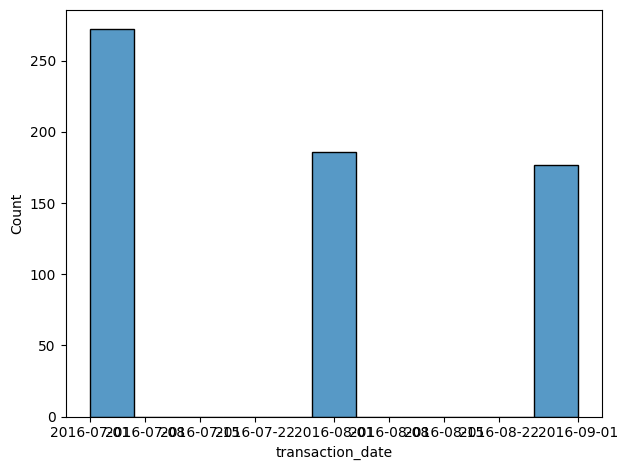

In [68]:
viz = df[df['payment_method'] == 'mygateway']

sns.histplot(viz['transaction_date'])

plt.tight_layout()

Despite being the highest in canceled order proportion, payment method mygateway only available from Jul-16 to Sep-16

In [69]:
check['canceled_global'] = df['is_canceled'].eq(1).sum()
check['proportion_to_canceled_global'] = check['count']/check['canceled_global']*100
check.sort_values(by = 'proportion_to_canceled_global', ascending = False)

,payment_method,is_canceled,count,total,proportion,canceled_global,proportion_to_canceled_global
4,Payaxis,1,60128,96204,62.500520,197236,30.485307
0,Easypay,1,51844,82619,62.750699,197236,26.285262
13,cod,1,20316,265809,7.643082,197236,10.300351
25,jazzwallet,1,16403,34299,47.823552,197236,8.316433
8,bankalfalah,1,16151,23011,70.188171,197236,8.188667
17,easypay_voucher,1,12084,31045,38.924142,197236,6.126671
2,Easypay_MA,1,9137,13921,65.634653,197236,4.632521
22,jazzvoucher,1,8108,15081,53.763013,197236,4.110811
6,apg,1,1361,1758,77.417520,197236,0.690036
29,mygateway,1,620,635,97.637795,197236,0.314344


Insights:
* Compared to the global total of canceled order, Payxis and Easypay payment method has the highest contribution of canceled order with >50% of orders are canceled

## **2.6 EDA by SKU**

In [70]:
check = df.groupby(['sku', 'is_canceled']).\
agg({'is_canceled':'count'}).\
rename(columns={'is_canceled':'count'}).\
sort_values(by = ['sku', 'count'], ascending = [True, False]).reset_index()

In [71]:
check['total'] = check.groupby(['sku'])['count'].transform('sum')
check['proportion'] = check['count'] / check['total']*100
check

,sku,is_canceled,count,total,proportion
0,Huawei Mate 8,1,10,10,100.000000
1,MHS_Kiss Bed Set-Bed Sheet - [Size] Double,0,1,1,100.000000
2,jjp_15000006-100-NIL,0,2,3,66.666667
3,jjp_15000006-100-NIL,1,1,3,33.333333
4,20-herbal_Face Cleaner Lotion,0,1,1,100.000000
...,...,...,...,...,...
111995,zuni16_314-A,0,1,1,100.000000
111996,zuni16_314-B,0,2,2,100.000000
111997,zuni16_315-A,0,1,1,100.000000
111998,zuni16_317-A,0,2,2,100.000000


In [72]:
check = check[check['is_canceled'] == 1]
check.sort_values(by = 'proportion', ascending = False)

,sku,is_canceled,count,total,proportion
0,Huawei Mate 8,1,10,10,100.000000
28613,GBHII_GS62-Black-Black-9,1,1,1,100.000000
28557,GBHII_GL228-FONE-FONE-7,1,1,1,100.000000
28568,GBHII_GL279-BLACK-BLACK-8,1,1,1,100.000000
28573,GBHII_GL509-BLACK-BLACK-12,1,1,1,100.000000
...,...,...,...,...,...
111130,un_Hair Care Bundle_HC,1,1,66,1.515152
67062,NDF_Peanut Chikkee 100gm,1,1,67,1.492537
102899,kcc_jazzy,1,3,242,1.239669
102885,kcc_force,1,1,98,1.020408


In [73]:
check['canceled_global'] = df['is_canceled'].eq(1).sum()
check['proportion_to_canceled_global'] = check['count']/check['canceled_global']*100
check.sort_values(by = 'proportion_to_canceled_global', ascending = False)

,sku,is_canceled,count,total,proportion,canceled_global,proportion_to_canceled_global
101743,infinix_Zero 4-Grey,1,1331,1793,74.233129,197236,0.674826
51563,MATSAM59DB75ADB2F80,1,882,3775,23.364238,197236,0.447180
100047,emart_00-7,1,807,2027,39.812531,197236,0.409155
7877,Al Muhafiz Sohan Halwa Almond,1,628,2258,27.812223,197236,0.318400
38233,Infinix Hot 4-Gold,1,513,1018,50.392927,197236,0.260095
...,...,...,...,...,...,...,...
48398,MATHON5B3DFA0B62D67,1,1,1,100.000000,197236,0.000507
48394,MATHON5B34AE1FA3BB0,1,1,10,10.000000,197236,0.000507
48392,MATHON5B34AD2CC0E7F,1,1,2,50.000000,197236,0.000507
48369,MATHON5B07B7E86607C,1,1,1,100.000000,197236,0.000507


## **2.5 EDA by BI Status**

In [74]:
check = df.groupby(['bi_status', 'is_canceled']).\
agg({'is_canceled':'count'}).\
rename(columns={'is_canceled':'count'}).\
sort_values(by = ['bi_status', 'count'], ascending = [True, False]).reset_index()

In [75]:
check['total'] = check.groupby(['bi_status'])['count'].transform('sum')
check['proportion'] = check['count'] / check['total']*100
check

,bi_status,is_canceled,count,total,proportion
0,Gross,1,197236,197422,99.905786
1,Gross,0,186,197422,0.094214
2,Net,0,230580,230580,100.000000
3,Valid,0,146275,146275,100.000000


In [76]:
check = check[check['is_canceled'] == 1]
check.sort_values(by = 'proportion', ascending = False)

,bi_status,is_canceled,count,total,proportion
0,Gross,1,197236,197422,99.905786


By BI Status, only status Gross has canceled order recorded indicating with 99.0% proportion of all order being canceled

In [77]:
check = df['bi_status'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
check['total'] = check['count'].sum()
check['proportion'] = check['count'] / check['total']*100
check

,bi_status,count,total,proportion
0,Net,230580,574277,40.151356
1,Gross,197422,574277,34.377487
2,Valid,146275,574277,25.471158


From total BI Status perspective, Gross value have 34.46% proportion of all BI Status. Almost identical to cancel status. This may not provide very useful insight for our hypotheses as the proportion of gross and cancel status is too near identical. We may remove this feature from further analysis

### **2.5.1 Removing Redundant Feature after EDA**

In [78]:
df = df.drop(['bi_status'], axis = 1)

In [79]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,year,month,transaction_date,customer_id,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,2016,7,2016-07-01,2,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,2016,7,2016-07-01,3,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,2016,7,2016-07-01,4,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,2016,7,2016-07-01,5,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,2016,7,2016-07-01,6,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574277 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   status            574277 non-null  object        
 1   sku               574277 non-null  object        
 2   price             574277 non-null  float64       
 3   qty_ordered       574277 non-null  int64         
 4   grand_total       574277 non-null  float64       
 5   increment_id      574277 non-null  object        
 6   category_name     574277 non-null  object        
 7   discount_amount   574277 non-null  float64       
 8   payment_method    574277 non-null  object        
 9   year              574277 non-null  int64         
 10  month             574277 non-null  int64         
 11  transaction_date  574277 non-null  datetime64[ns]
 12  customer_id       574277 non-null  object        
 13  is_canceled       574277 non-null  int64         
 14  is_discou

In [81]:
df.shape

(574277, 15)

In [82]:
# from google.colab import files

# # Save the DataFrame as a CSV in the current working directory
# df.to_csv('V4_pakistans_largest_ecommerce_toviz.csv', index=False)

# # Download the file to your local machine
# files.download('V4_pakistans_largest_ecommerce_toviz.csv')

# **3. Exploratory Data Analysis - Customer Focus**

## **3.1 Grouping by Customer ID**

### **3.1.1 Initial Grouping**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574277 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   status            574277 non-null  object        
 1   sku               574277 non-null  object        
 2   price             574277 non-null  float64       
 3   qty_ordered       574277 non-null  int64         
 4   grand_total       574277 non-null  float64       
 5   increment_id      574277 non-null  object        
 6   category_name     574277 non-null  object        
 7   discount_amount   574277 non-null  float64       
 8   payment_method    574277 non-null  object        
 9   year              574277 non-null  int64         
 10  month             574277 non-null  int64         
 11  transaction_date  574277 non-null  datetime64[ns]
 12  customer_id       574277 non-null  object        
 13  is_canceled       574277 non-null  int64         
 14  is_discou

Lets isolate only on transaction date above Q3 2017, so Q4 2017 and above

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574277 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   status            574277 non-null  object        
 1   sku               574277 non-null  object        
 2   price             574277 non-null  float64       
 3   qty_ordered       574277 non-null  int64         
 4   grand_total       574277 non-null  float64       
 5   increment_id      574277 non-null  object        
 6   category_name     574277 non-null  object        
 7   discount_amount   574277 non-null  float64       
 8   payment_method    574277 non-null  object        
 9   year              574277 non-null  int64         
 10  month             574277 non-null  int64         
 11  transaction_date  574277 non-null  datetime64[ns]
 12  customer_id       574277 non-null  object        
 13  is_canceled       574277 non-null  int64         
 14  is_discou

#### **3.1.1.1 Group Numerical Features**

In [107]:
df_num = df.groupby('customer_id').agg({'grand_total':'sum','qty_ordered':'sum','price':'mean','discount_amount':'sum', 'is_discounted':'sum'}).reset_index()
df_num.head()

,customer_id,grand_total,qty_ordered,price,discount_amount,is_discounted
0,10,366.0,2,183.0,0.0,0
1,100,5588.0,4,1397.0,0.0,0
2,1000,524995.0,5,105999.0,5000.0,1
3,10000,995.0,1,995.0,0.0,0
4,100000,1500.0,3,500.0,0.0,0


#### **3.1.1.2 Group Status Features**

In [108]:
df_status = df.groupby(['customer_id','status']).size().unstack(fill_value = 0).reset_index()
df_status.head()

status,customer_id,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund
0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,100,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1
2,1000,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### **3.1.1.3 Group Product Category Features**

In [109]:
df_cat = df.groupby(['customer_id','category_name']).size().unstack(fill_value = 0).reset_index()
df_cat.head()

category_name,customer_id,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion
0,10,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,100,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
2,1000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,100000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### **3.1.1.4 Group Payment Method Features**

In [110]:
df_paym = df.groupby(['customer_id','payment_method']).size().unstack(fill_value = 0).reset_index()
df_paym.head()

payment_method,customer_id,Easypay,Easypay_MA,Payaxis,apg,bankalfalah,cashatdoorstep,cod,customercredit,easypay_voucher,financesettlement,internetbanking,jazzvoucher,jazzwallet,marketingexpense,mcblite,mygateway,productcredit,ublcreditcard
0,10,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,100,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
2,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0
3,10000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,100000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### **3.1.1.5 Group Transaction Date Features**

In [111]:
df_td = df.groupby(['customer_id','transaction_date']).size().unstack(fill_value = 0).reset_index()
df_td.head()

transaction_date,customer_id,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,...,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00
0,10,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,2,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,1000,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### **3.1.1.6 Group into One & Add Other Features**

In [112]:
df_cust = pd.merge(df_num, df_status, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_cat, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_paym, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_td, how='inner', on='customer_id')

In [113]:
def flag(val):
  if val > 0:
    return 1
  else:
    return 0

In [114]:
df_cust['is_canceled'] = df_cust['canceled'].apply(flag)

In [115]:
df_cust.columns

Index([       'customer_id',        'grand_total',        'qty_ordered',
                    'price',    'discount_amount',      'is_discounted',
                 'canceled',             'closed',              'cod_x',
                 'complete',           'exchange',              'fraud',
                   'holded',     'order_refunded',               'paid',
           'payment_review',            'pending',     'pending_paypal',
               'processing',           'received',             'refund',
               'Appliances',  'Beauty & Grooming',              'Books',
                'Computing',      'Entertainment',    'Health & Sports',
            'Home & Living',        'Kids & Baby',      'Men's Fashion',
        'Mobiles & Tablets',             'Others', 'School & Education',
                  'Soghaat',         'Superstore',    'Women's Fashion',
                  'Easypay',         'Easypay_MA',            'Payaxis',
                      'apg',        'bankalfalah', 

There seems to be a double column value from order status and payment method (cod_x for status, cod_y for payment_method), lets make them distinct

In [116]:
df_cust = df_cust.rename(columns = {'cod_x':'cod_status', 'cod_y':'cod_payment'})

Lets make a total order column by Sum the number of orders recorded for each customer

In [117]:
df_cust['total_order'] = df_cust[['canceled', 'closed', 'cod_status', 'complete', 'exchange',\
                             'fraud', 'holded', 'order_refunded', 'paid', 'payment_review',\
                             'pending', 'pending_paypal', 'processing', 'received', 'refund']].sum(axis = 1)

Lets add percentage of canceled orders

In [118]:
df_cust['canceled_proportion'] = df_cust['canceled'] / df_cust['total_order']*100

In [119]:
df_cust.head()

,customer_id,grand_total,qty_ordered,price,discount_amount,is_discounted,canceled,closed,cod_status,complete,...,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,is_canceled,total_order,canceled_proportion
0,10,366.0,2,183.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.0
1,100,5588.0,4,1397.0,0.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,4,0.0
2,1000,524995.0,5,105999.0,5000.0,1,4,0,0,1,...,0,0,0,0,0,0,0,1,5,80.0
3,10000,995.0,1,995.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4,100000,1500.0,3,500.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.0


## **3.2 EDA by Pairplot of Statuses**

In [120]:
import matplotlib.font_manager as fm

# List all available fonts
font_paths = fm.findSystemFonts()
font_names = [fm.FontProperties(fname=font).get_name() for font in font_paths]
print(font_names)

['Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono', 'Liberation Serif', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow']


In [121]:
df_cust.columns

Index([        'customer_id',         'grand_total',         'qty_ordered',
                     'price',     'discount_amount',       'is_discounted',
                  'canceled',              'closed',          'cod_status',
                  'complete',            'exchange',               'fraud',
                    'holded',      'order_refunded',                'paid',
            'payment_review',             'pending',      'pending_paypal',
                'processing',            'received',              'refund',
                'Appliances',   'Beauty & Grooming',               'Books',
                 'Computing',       'Entertainment',     'Health & Sports',
             'Home & Living',         'Kids & Baby',       'Men's Fashion',
         'Mobiles & Tablets',              'Others',  'School & Education',
                   'Soghaat',          'Superstore',     'Women's Fashion',
                   'Easypay',          'Easypay_MA',             'Payaxis',
            

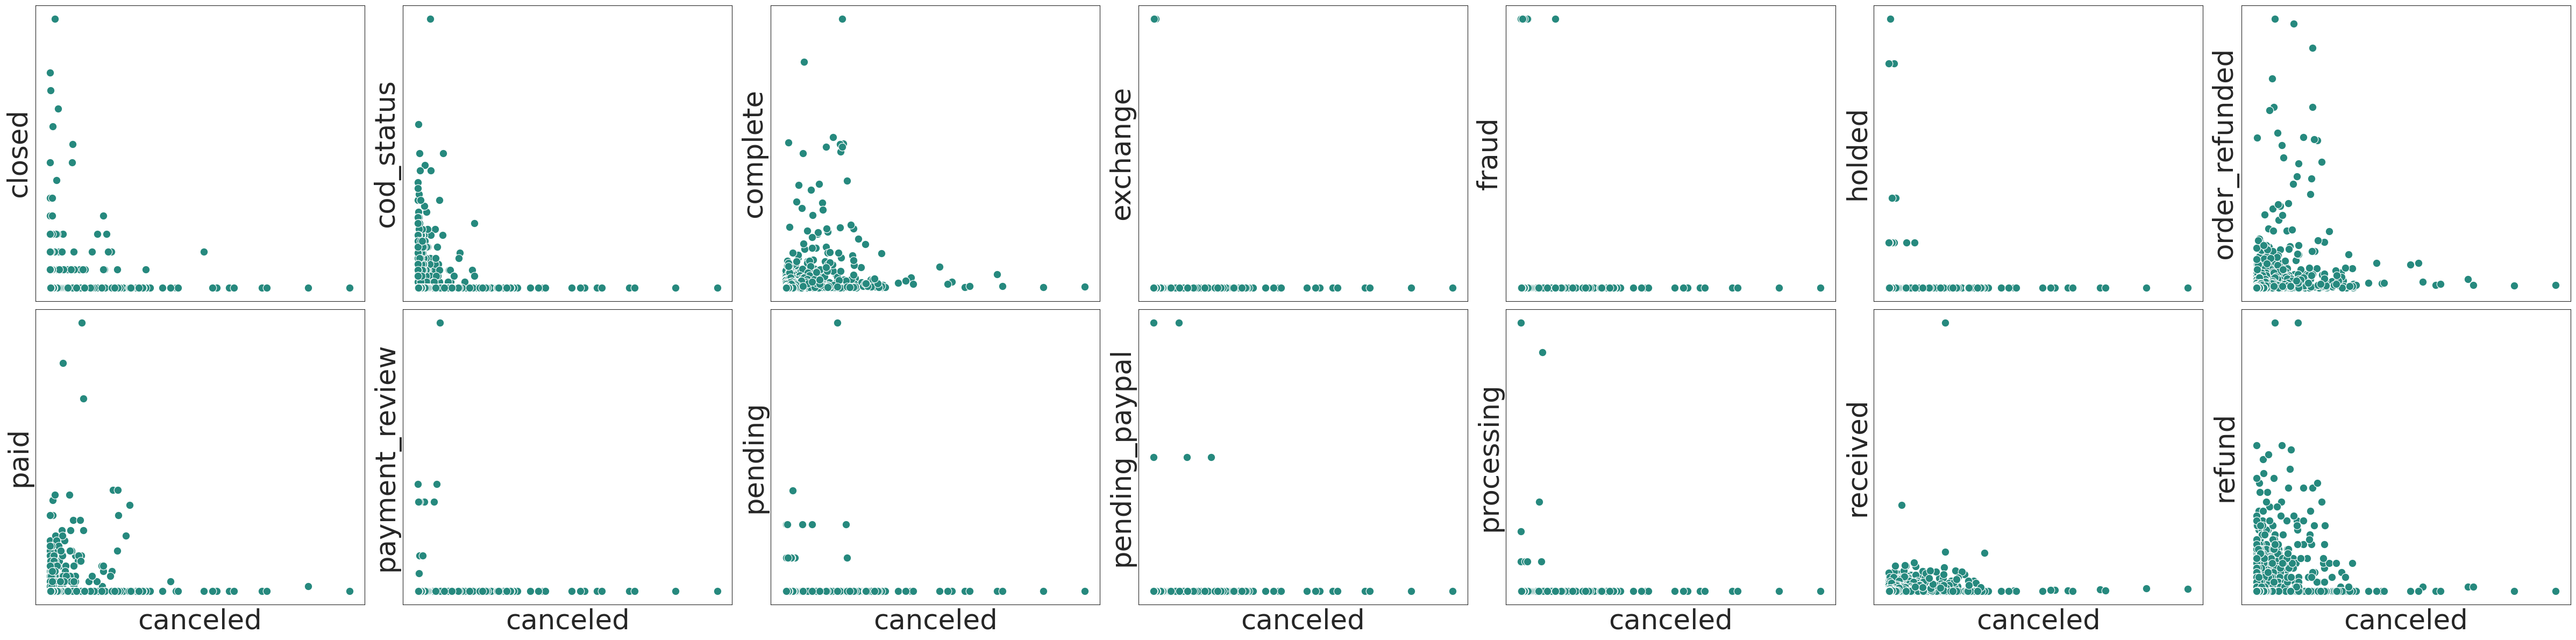

In [122]:
custval = ['closed', 'cod_status', 'complete', 'exchange', 'fraud', 'holded',\
           'order_refunded', 'paid', 'payment_review', 'pending',\
           'pending_paypal', 'processing', 'received', 'refund']

fig, ax = plt.subplots(2, 7, figsize = (48,12))
ax = ax.flatten()

for i, val in enumerate(custval):
  sns.scatterplot(df_cust, x = 'canceled', y = val, ax = ax[i], color = '#26897E', s=110)
  sns.set_style("white")
  ax[i].set_ylabel(val, fontsize=37)
  ax[i].set_xlabel('canceled', fontsize=37)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  if i < 7:  # Check if the subplot is in the first row (indices 0-6)
        ax[i].set_xlabel('')


plt.tight_layout()

Insights:
* There seems to be no strong correlation between other order statuses occurences with tha increase of canceled order

## **3.3 EDA by Pairplot of Categories**

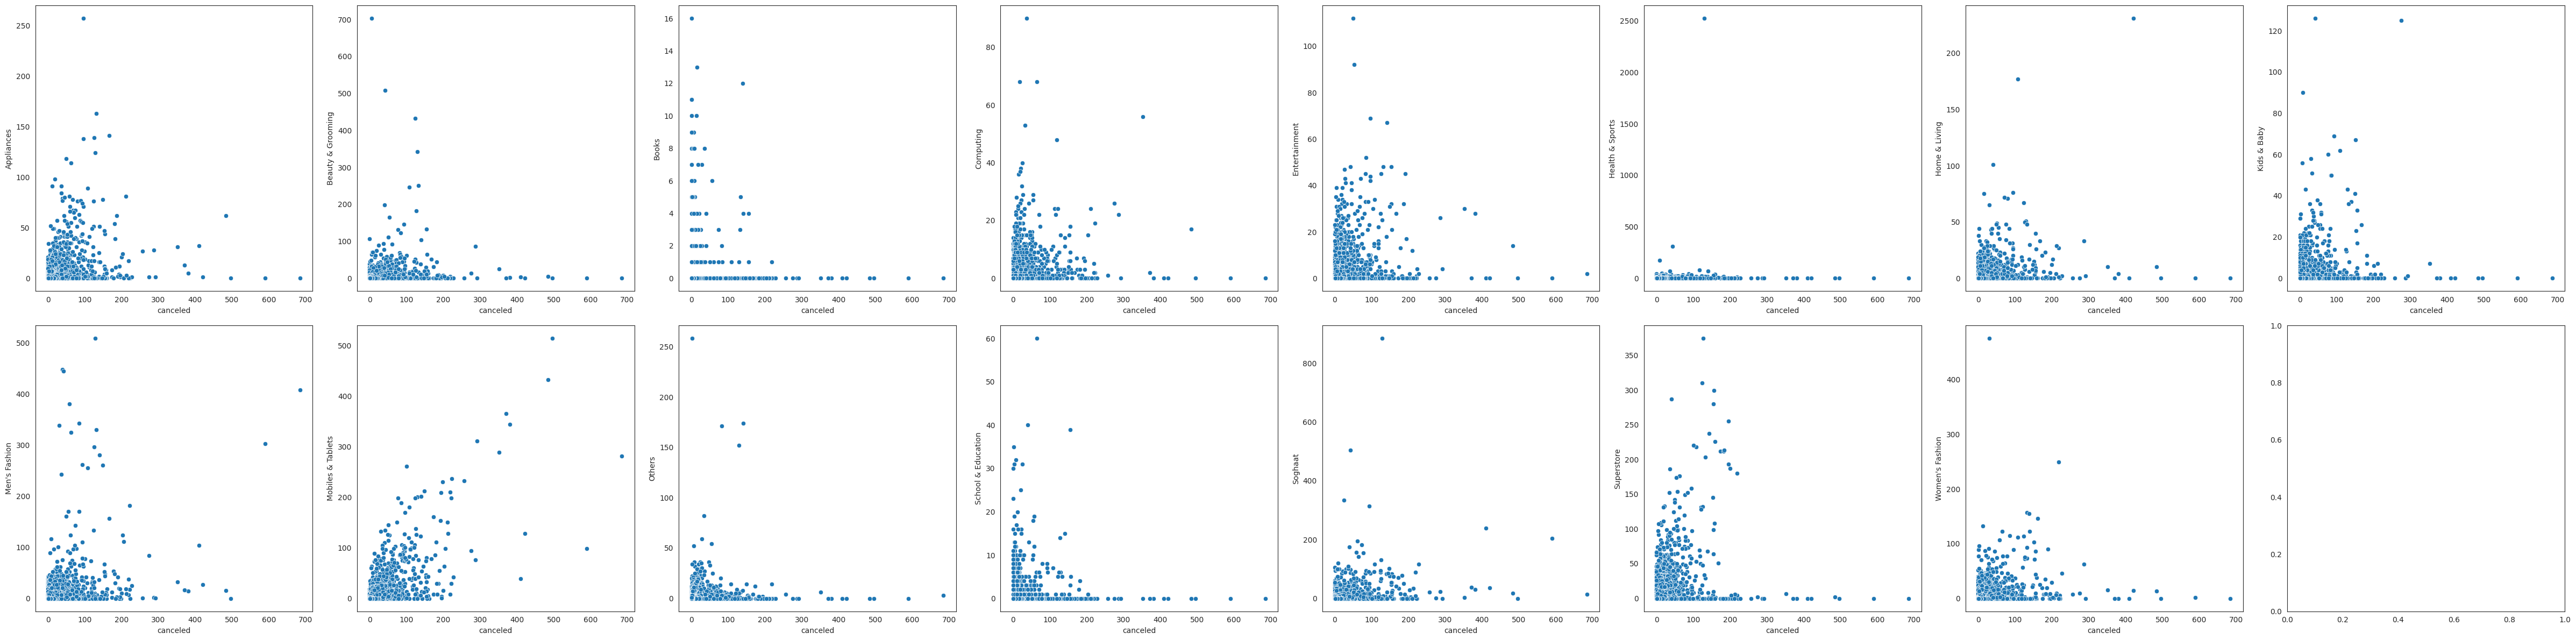

In [123]:
custval = ['Appliances', 'Beauty & Grooming', 'Books', 'Computing',\
           'Entertainment', 'Health & Sports', 'Home & Living', 'Kids & Baby',\
           "Men's Fashion", 'Mobiles & Tablets', 'Others', 'School & Education',\
           'Soghaat', 'Superstore', "Women's Fashion"]

fig, ax = plt.subplots(2, 8, figsize = (48,12))
ax = ax.flatten()

for i, val in enumerate(custval):
  sns.scatterplot(df_cust, x = 'canceled', y = val, ax = ax[i])

plt.tight_layout()

There seems to be some indication that mobiles & tablets product correlated with high cancellation